# Crop Recommendation System Using Machine Learning

This notebook demonstrates how to build a **Crop Recommendation System** that predicts the most suitable crops for farmers based on various parameters like temperature, rainfall, soil conditions, and other factors. The system uses machine learning algorithms to predict the crop recommendations.

## Steps Involved
1. **Data Acquisition**: Load the data from various CSV files.
2. **Data Preprocessing**: Clean and transform the data for machine learning.
3. **Model Training**: Train multiple machine learning models.
4. **Model Evaluation**: Evaluate the performance of each model.
5. **Model Saving**: Save the best model for future predictions.
6. **Prediction**: Use the saved model to predict the crop for new data.

In [ ]:
!pip install pandas scikit-learn


    region crop_type  yield fertilizer_type  fertilizer_amount soil_type  \
0  Central    Potato    6.7      Phosphorus                135     Sandy   
1  Central    Potato    6.7      Phosphorus                135     Sandy   
2  Central    Potato    6.7      Phosphorus                135     Sandy   
3  Central    Potato    6.7      Phosphorus                135     Sandy   
4  Central    Potato    6.7      Phosphorus                135      Clay   

   nitrogen_content  phosphorus_content  potassium_content  moisture_level  \
0              0.56                0.65               0.81              20   
1              0.56                0.65               0.81              20   
2              0.56                0.65               0.81              20   
3              0.56                0.65               0.81              20   
4              1.60                0.70               0.89              16   

   temperature  rainfall  
0           33       130  
1           30      

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


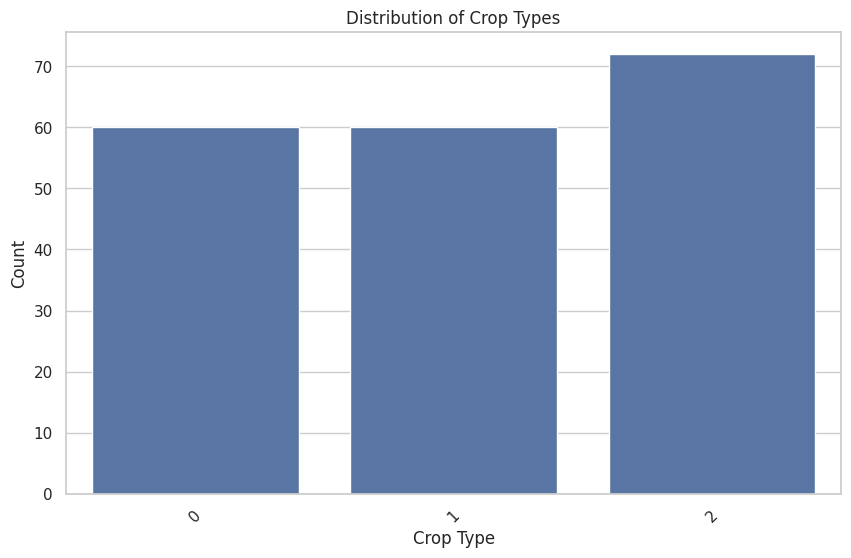

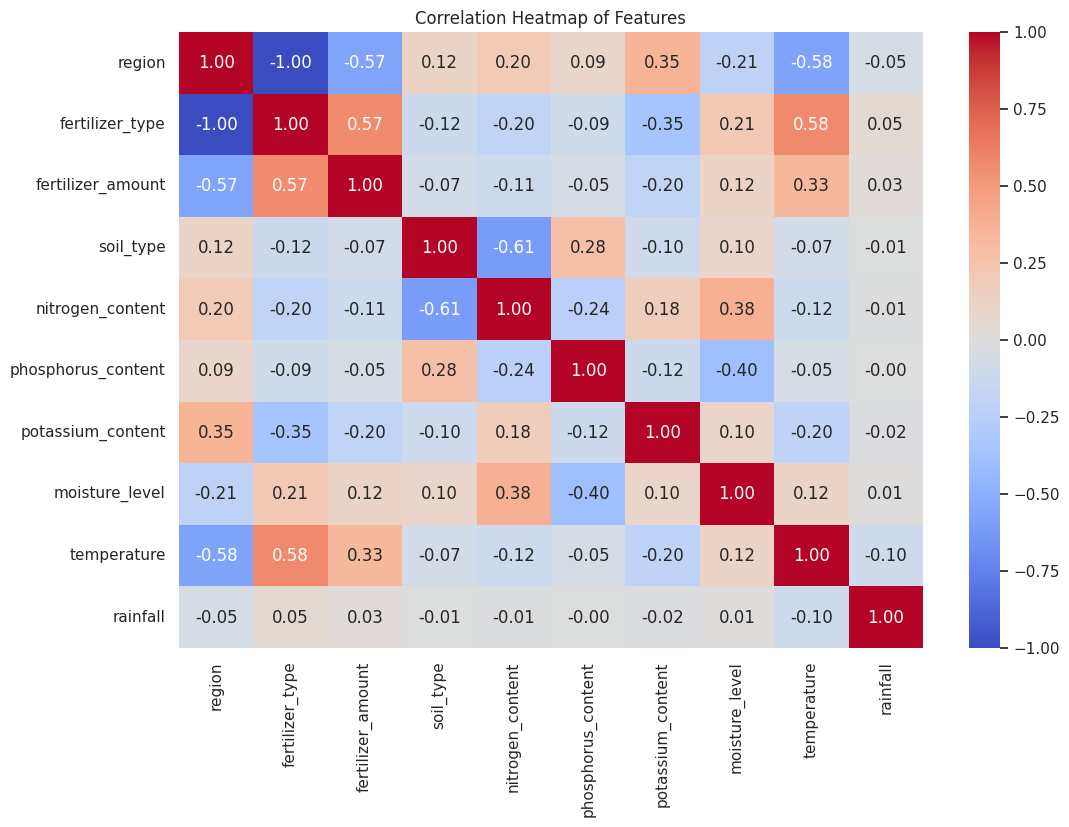

<Figure size 1000x600 with 0 Axes>

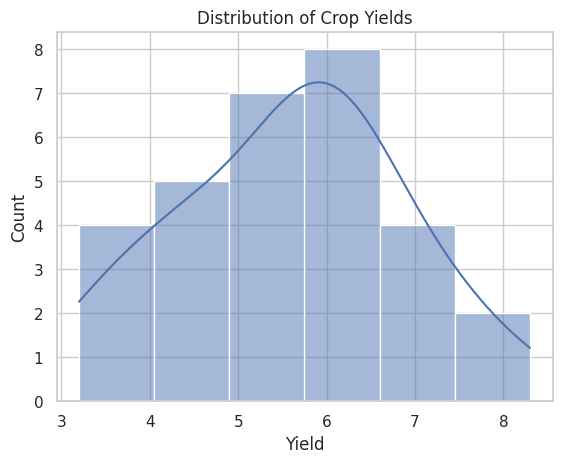

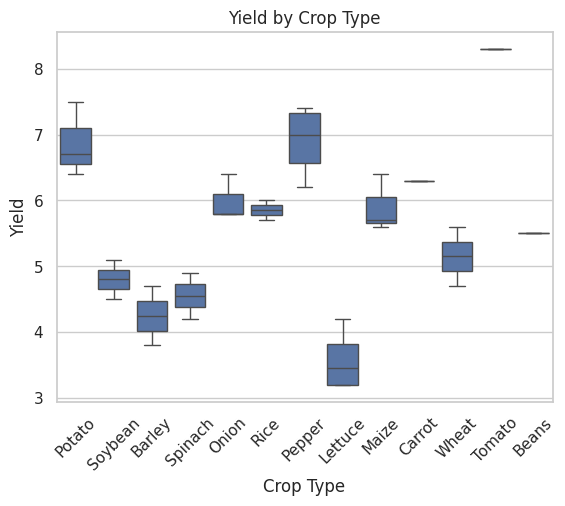

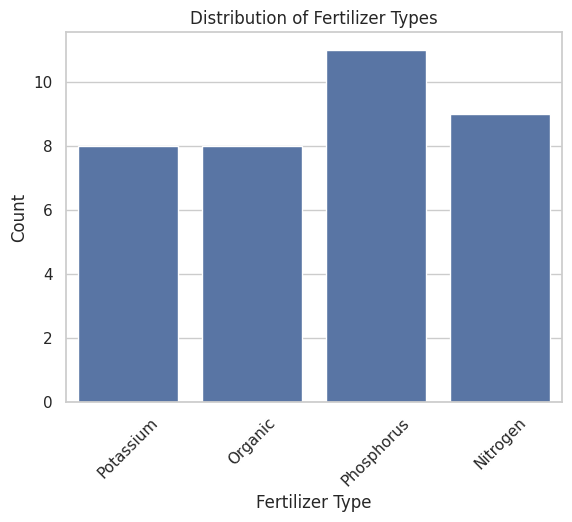

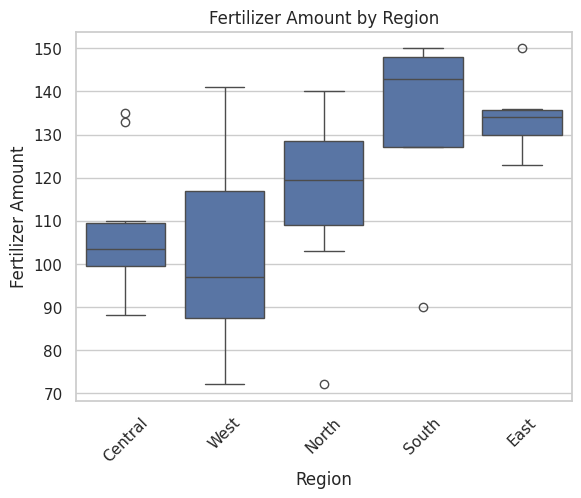

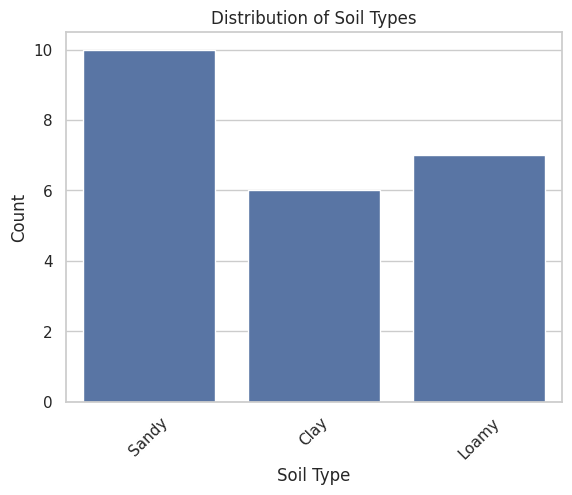

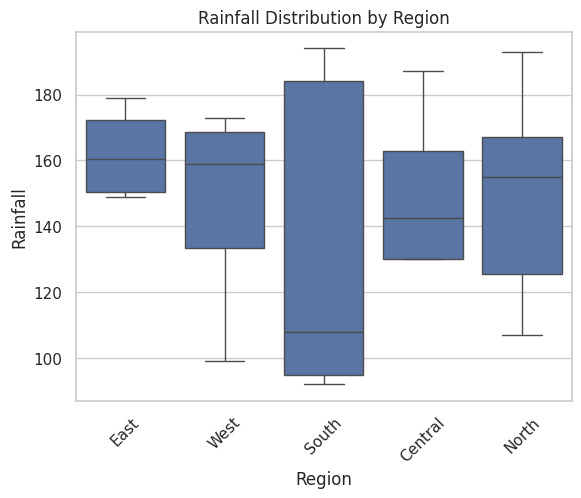

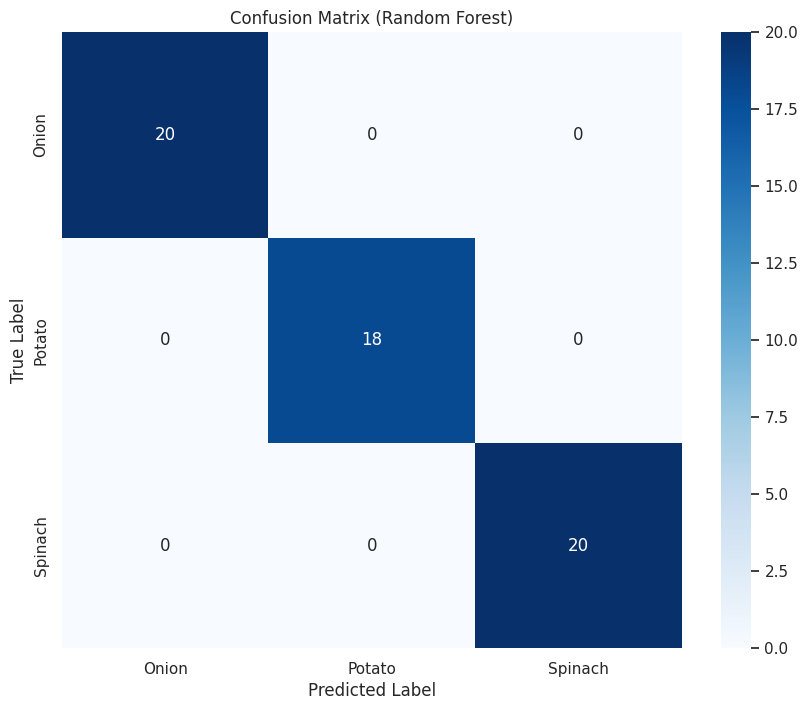

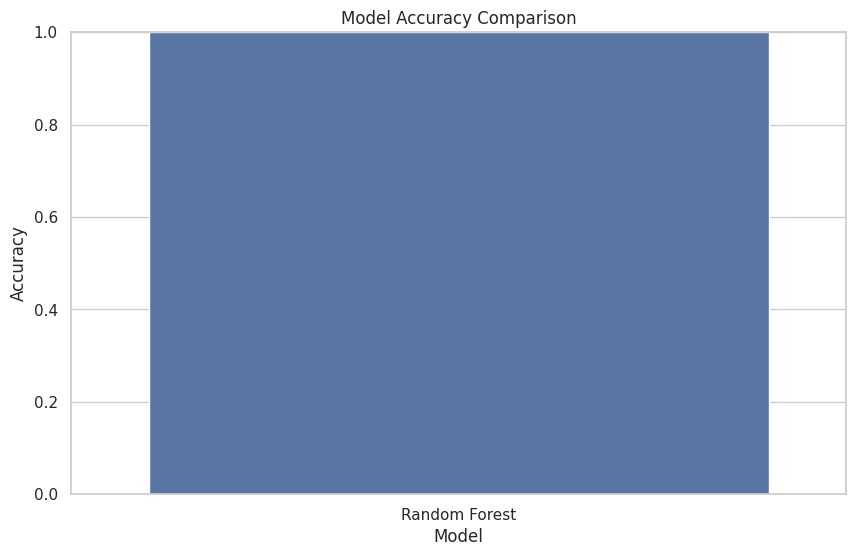

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

# datasets
yield_data = pd.read_csv('yield_data.csv')
fertilizer_data = pd.read_csv('fertilizer.csv')
soil_data = pd.read_csv('soil_data.csv')
weather_data = pd.read_csv('weather.csv')

df = pd.merge(yield_data, fertilizer_data, on=['region', 'crop_type'], how='inner')
df = pd.merge(df, soil_data, on='region', how='inner')
df = pd.merge(df, weather_data, on='region', how='inner')

print(df.head())

crop_type_encoder = LabelEncoder()
region_encoder = LabelEncoder()
soil_type_encoder = LabelEncoder()
fertilizer_type_encoder = LabelEncoder()


df['crop_type'] = crop_type_encoder.fit_transform(df['crop_type'])
df['region'] = region_encoder.fit_transform(df['region'])
df['soil_type'] = soil_type_encoder.fit_transform(df['soil_type'])
df['fertilizer_type'] = fertilizer_type_encoder.fit_transform(df['fertilizer_type'])


X = df.drop(columns=['crop_type', 'yield'])
y = df['crop_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# machine learning models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Training the models
model_accuracies = []
for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies.append((model_name, accuracy))
    print(f'Accuracy of {model_name}: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))

    with open(f'{model_name}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

    print(f'{model_name} model saved successfully.\n')

with open('Random Forest_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)

sample_input = [[1, 0.5, 0.7, 1.1, 20, 30, 150, 0, 1, 2]]

sample_input_scaled = scaler.transform(sample_input)

prediction = rf_model.predict(sample_input_scaled)

predicted_crop = crop_type_encoder.inverse_transform(prediction)
print(f'The recommended crop for the given input is: {predicted_crop[0]}')

# Graphs

# 1. Distribution of Crop Types
plt.figure(figsize=(10, 6))
sns.countplot(x='crop_type', data=df)
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop(columns=['crop_type', 'yield']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

y_pred_rf = models['Random Forest'].predict(X_test)

# Load your datasets
yield_data = pd.read_csv('yield_data.csv')
fertilizer_data = pd.read_csv('fertilizer.csv')
soil_data = pd.read_csv('soil_data.csv')
weather_data = pd.read_csv('weather.csv')

# Set up plot styles
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Yield Data Visualization
# Histogram of Yield
plt.figure()
sns.histplot(yield_data['yield'], kde=True)
plt.title('Distribution of Crop Yields')
plt.xlabel('Yield')
plt.show()

# Boxplot of Yield by Crop Type
plt.figure()
sns.boxplot(x='crop_type', y='yield', data=yield_data)
plt.title('Yield by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.show()

# 2. Fertilizer Data Visualization
# Bar Plot of Fertilizer Type
plt.figure()
sns.countplot(x='fertilizer_type', data=fertilizer_data)
plt.title('Distribution of Fertilizer Types')
plt.xlabel('Fertilizer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Boxplot of Fertilizer Amount by Region
plt.figure()
sns.boxplot(x='region', y='fertilizer_amount', data=fertilizer_data)
plt.title('Fertilizer Amount by Region')
plt.xlabel('Region')
plt.ylabel('Fertilizer Amount')
plt.xticks(rotation=45)
plt.show()

# 3. Soil Data Visualization
# Bar Plot of Soil Type
plt.figure()
sns.countplot(x='soil_type', data=soil_data)
plt.title('Distribution of Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



# 4. Weather Data Visualization

plt.figure()
sns.boxplot(x='region', y='rainfall', data=weather_data)
plt.title('Rainfall Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Rainfall')
plt.xticks(rotation=45)
plt.show()


# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# onfusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=crop_type_encoder.classes_, yticklabels=crop_type_encoder.classes_)
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3. Model Performance Comparison (Accuracy)
model_accuracies_df = pd.DataFrame(model_accuracies, columns=['Model', 'Accuracy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_accuracies_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()



